In [3]:
#decision tree, random forest, adaboost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd


'c:\\Users\\informatika\\Documents\\1letnik\\ml_course\\2'

In [5]:
df = pd.read_csv('data\housing.data', delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.columns = col_name

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.7506208284792175


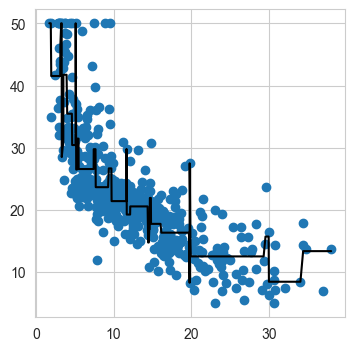

In [31]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
tree = DecisionTreeRegressor(max_depth=5)
y = df[["MEDV"]].values
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(4,4))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
print(tree.score(X[sort_idx],y[sort_idx] ))

0.6858564157653633
0.5630431406645209


array([1.])

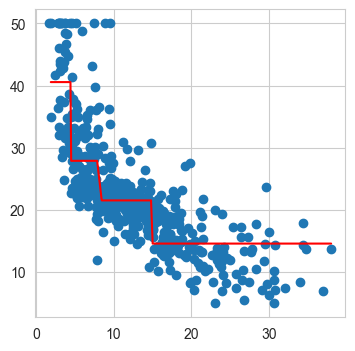

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df[['LSTAT']].values
tree = DecisionTreeRegressor(max_depth=2)
y = df[["MEDV"]].values
x_tr, x_te, y_tr, y_te = train_test_split(X,y, test_size= 0.3, random_state=0 )
tree.fit(x_tr, y_tr)
print(tree.score(x_tr, y_tr))
print(tree.score(x_te, y_te))
mask = x_te.flatten().argsort()
plt.figure(figsize=(4,4))
plt.scatter(X,y)
plt.plot(x_te[mask], tree.predict(x_te[mask]), c = "red")
tree.feature_importances_

In [74]:
X = df[df.columns[:-1]].values
tree = DecisionTreeRegressor(max_depth=2)
x_tr, x_te, y_tr, y_te = train_test_split(X,y, test_size= 0.3, random_state=0 )
tree.fit(x_tr, y_tr)
print(tree.score(x_tr, y_tr))
print(tree.score(x_te, y_te))
d = pd.DataFrame(tree.feature_importances_, df.columns[:-1])
from sklearn.metrics import r2_score
d.columns = ["f"]
d = d.sort_values(by="f", ascending=False)
d


0.7204305657771242
0.622596538377147


,f
RM,0.787405
LSTAT,0.212595
CRIM,0.000000
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
NOX,0.000000
AGE,0.000000
DIS,0.000000
RAD,0.000000
